In [3]:
# PRZYGOTOWANIE ŚRODOWISKA
# --- Importy ---
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, roc_auc_score, roc_curve,
                             confusion_matrix, ConfusionMatrixDisplay,
                             classification_report)

pd.set_option("display.max_columns", 100)
plt.rcParams["figure.figsize"] = (8, 5)

print("Środowisko gotowe.")

Środowisko gotowe.


In [4]:
# Ścieżki względne do plików (folder "data" w tym samym katalogu co notebook)
DATA_PATH_DAYS = "data/ph_v1_days.csv"
DATA_PATH_PHLIST = "data/phlist.csv"
DATA_PATH_PRODS = "data/prods.csv"

def load_data(path: str) -> pd.DataFrame:
    """Funkcja pomocnicza do wczytywania plików CSV lub Excel."""
    _, ext = os.path.splitext(path.lower())
    if ext == ".csv":
        df = pd.read_csv(path)
    elif ext in [".xlsx", ".xls"]:
        df = pd.read_excel(path)
    else:
        raise ValueError("Obsługiwane są tylko pliki .csv oraz .xlsx/.xls")
    return df

df_days = load_data(DATA_PATH_DAYS)
df_phlist = load_data(DATA_PATH_PHLIST)
df_prods = load_data(DATA_PATH_PRODS)


print("=== Dane dzienne (ph_v1_days.csv) ===")
display(df_days.head(10))
print("\nInformacje o ramce danych:")
df_days.info()
print("Wymiary:", df_days.shape)

print("\n\n=== Lista pomiarów pH (phlist.csv) ===")
display(df_phlist.head(10))
print("\nInformacje o ramce danych:")
df_phlist.info()
print("Wymiary:", df_phlist.shape)

print("\n\n=== Produkty (prods.csv) ===")
display(df_prods.head(10))
print("\nInformacje o ramce danych:")
df_prods.info()
print("Wymiary:", df_prods.shape)

=== Dane dzienne (ph_v1_days.csv) ===


,Date,PH_morning,PH_midday,PH_evening,PH_avg,Ailment,Gym,Liquid,Lemon water,Tea(black/green),Fruit tea,Water,Latte,Mineral water (Esentuki - 4),Mineral water (Borjomi),Mineral water (Prolom),Tequila,Red wine,White wine,Strong alcohol,Beer,Morse,Milk,Orange juice,Oatmeal,Pizza with meat,Cheese Pizza,Cheesecakes,Scrambled eggs,Mayonnaise salad,Bread,Meat,Sauce,Cutlet,Sausage,Fish,Sushi,Cod liver,Cheese,Curd,Sour cream,Buckwheat porridge,Noodles with vegetables,Noodles with shrimp,Meat pilaf,Meatless pilaf,Pea soup with meat,Fried vegetables,Pyagse with vegetables,Dumplings with cabbage,Potato dumplings,Zucchini Fritters,Stewed cabbage,Solyanka with meat,Eggplant with cheese,Pasta,Fried potatoes,Cooked Potatoes,Braised Potatoes,Mashed potatoes,Apple Pie,Patty with cabbage,Curd Pie,Cheese Pie,Egg Pie,Potato pie,Meat pie,Khachapuri,The nuts,Pumpkin seeds,Raisins,Dried apricots,Vegetable salad,Eggplant caviar,The vinaigrette,Apple,Peach,Melon,Plum,Tangerines,Pear,Watermelon,Banana,Grapes,Pineapple,Orange,Paste,Kumquat,Ice cream,Cookie,Cake,Bun,Croissant,Chocolate,Candies,Halva,Marshmallow,Red caviar,Jelly
0,06.09.2017,5.41,5.25,5.55,5.40,NaN,NaN,1300,250.0,NaN,600.0,300.0,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,40.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,200.0,NaN,100.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07.09.2017,7.06,5.70,5.32,6.03,NaN,1.0,1300,250.0,NaN,600.0,300.0,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,220.0,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,80.0,NaN,NaN,80.0,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08.09.2017,6.26,5.75,5.43,5.81,NaN,NaN,1350,250.0,NaN,600.0,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,220.0,NaN,NaN,NaN,NaN,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09.09.2017,5.35,6.85,6.09,6.10,NaN,NaN,2350,250.0,NaN,600.0,400.0,NaN,NaN,250.0,NaN,NaN,350.0,NaN,NaN,500.0,NaN,NaN,NaN,220.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.09.2017,6.62,6.34,5.23,6.06,NaN,1.0,1600,250.0,NaN,600.0,300.0,NaN,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,0.0,200.0,NaN,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN,50.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11.09.2017,5.37,6.16,5.48,5.67,NaN,NaN,1700,250.0,NaN,600.0,NaN,NaN,NaN,500.0,NaN,NaN,150.0,NaN,NaN,NaN,200.0,NaN,NaN,220.0,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,NaN,NaN,NaN,80.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,180.0,150.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12.09.2017,6.96,6.69,6.50,6.72,NaN,1.0,1550,250.0,NaN,600.0,300.0,NaN,NaN,250.0,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,220.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na


Informacje o ramce danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 99 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          212 non-null    object 
 1   PH_morning                    212 non-null    float64
 2   PH_midday                     212 non-null    float64
 3   PH_evening                    210 non-null    float64
 4   PH_avg                        212 non-null    float64
 5   Ailment                       17 non-null     float64
 6   Gym                           62 non-null     float64
 7   Liquid                        212 non-null    int64  
 8   Lemon water                   190 non-null    float64
 9   Tea(black/green)              21 non-null     float64
 10  Fruit tea                     205 non-null    float64
 11  Water                         164 non-null    float64
 12  Latte                         17 non

,PH,time,date
0,4.56,8.00,09.04.2018
1,5.04,9.00,09.04.2018
2,4.72,11.50,09.04.2018
3,5.02,12.50,09.04.2018
4,5.11,15.20,09.04.2018
5,4.59,19.05,09.04.2018
6,4.80,21.05,09.04.2018
7,4.96,23.09,09.04.2018
8,5.16,23.59,09.04.2018
9,4.58,7.30,10.04.2018



Informacje o ramce danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH      1372 non-null   float64
 1   time    1372 non-null   float64
 2   date    1372 non-null   object 
dtypes: float64(2), object(1)
memory usage: 32.3+ KB
Wymiary: (1372, 3)


=== Produkty (prods.csv) ===


,Date,Product,Weight,Time
0,09.04.2018,Water,300,7.00
1,09.04.2018,Water,250,8.00
2,09.04.2018,Lemon water,300,9.40
3,09.04.2018,Oatmeal,220,10.30
4,09.04.2018,Fruit tea,250,10.30
5,09.04.2018,Mineral water (Prolom),250,12.05
6,09.04.2018,Paste,12,12.05
7,09.04.2018,Pasta,43,12.30
8,09.04.2018,Apple,232,13.00
9,09.04.2018,Mineral water (Prolom),250,14.50



Informacje o ramce danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     3840 non-null   object 
 1   Product  3840 non-null   object 
 2   Weight   3840 non-null   int64  
 3   Time     3840 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 120.1+ KB
Wymiary: (3840, 4)


In [7]:
# 2. Etap: Wstępne przetwarzanie danych

from sklearn.preprocessing import StandardScaler

def clean_columns(df: pd.DataFrame) -> pd.DataFrame:
    df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]
    return df

df_days = clean_columns(df_days)
df_phlist = clean_columns(df_phlist)
df_prods = clean_columns(df_prods)

#  Konwersja
for col in ["date", "date_", "visit_date"]:
    if col in df_days.columns:
        df_days[col] = pd.to_datetime(df_days[col], errors="coerce", dayfirst=True)
    if col in df_phlist.columns:
        df_phlist[col] = pd.to_datetime(df_phlist[col], errors="coerce", dayfirst=True)
    if col in df_prods.columns:
        df_prods[col] = pd.to_datetime(df_prods[col], errors="coerce", dayfirst=True)

# Brakuące wartości 
print("\nBrakujące wartości w zbiorze dziennym (df_days) ")
print(df_days.isna().sum()[df_days.isna().sum() > 0].sort_values(ascending=False).head(10))

print("\n Brakujące wartości w zbiorze phlist (df_phlist) ")
print(df_phlist.isna().sum())

print("\n Brakujące wartości w zbiorze prods (df_prods)")
print(df_prods.isna().sum())

# W zbiorze dziennym: brakujące PH_evening zastąpione średnią z dnia
if {"ph_evening", "ph_avg"}.issubset(df_days.columns):
    df_days["ph_evening"] = df_days["ph_evening"].fillna(df_days["ph_avg"])

# Brakujące wartości w płynach lub ilościach → 0
for col in df_days.columns:
    if df_days[col].dtype in ["float64", "int64"]:
        df_days[col] = df_days[col].fillna(0)

# Braki w df_prods → brakujące godziny zastępujemy medianą
if "time" in df_prods.columns:
    df_prods["time"] = df_prods["time"].fillna(df_prods["time"].median())

#  Zmiana typów
if "product" in df_prods.columns:
    df_prods["product"] = df_prods["product"].astype("category")

# Normalizacja
if "liquid" in df_days.columns:
    scaler = StandardScaler()
    df_days["liquid_scaled"] = scaler.fit_transform(df_days[["liquid"]])
    print("Dodano kolumnę 'liquid_scaled' (standaryzowana ilość płynów).")

# Podgląd
print("\n Podgląd danych dziennych po przetworzeniu ")
display(df_days.head(5))

print("\nPodgląd danych pH-list po przetworzeniu ")
display(df_phlist.head(5))

print("\n Podgląd danych produktów po przetworzeniu ")
display(df_prods.head(5))



Brakujące wartości w zbiorze dziennym (df_days) 
Series([], dtype: int64)

 Brakujące wartości w zbiorze phlist (df_phlist) 
ph      0
time    0
date    0
dtype: int64

 Brakujące wartości w zbiorze prods (df_prods)
date       0
product    0
weight     0
time       0
dtype: int64
Dodano kolumnę 'liquid_scaled' (standaryzowana ilość płynów).

 Podgląd danych dziennych po przetworzeniu 


,date,ph_morning,ph_midday,ph_evening,ph_avg,ailment,gym,liquid,lemon_water,tea(black/green),fruit_tea,water,latte,mineral_water_(esentuki_-_4),mineral_water_(borjomi),mineral_water_(prolom),tequila,red_wine,white_wine,strong_alcohol,beer,morse,milk,orange_juice,oatmeal,pizza_with_meat,cheese_pizza,cheesecakes,scrambled_eggs,mayonnaise_salad,bread,meat,sauce,cutlet,sausage,fish,sushi,cod_liver,cheese,curd,sour_cream,buckwheat_porridge,noodles_with_vegetables,noodles_with_shrimp,meat_pilaf,meatless_pilaf,pea_soup_with_meat,fried_vegetables,pyagse_with_vegetables,dumplings_with_cabbage,potato_dumplings,zucchini_fritters,stewed_cabbage,solyanka_with_meat,eggplant_with_cheese,pasta,fried_potatoes,cooked_potatoes,braised_potatoes,mashed_potatoes,apple_pie,patty_with_cabbage,curd_pie,cheese_pie,egg_pie,potato_pie,meat_pie,khachapuri,the_nuts,pumpkin_seeds,raisins,dried_apricots,vegetable_salad,eggplant_caviar,the_vinaigrette,apple,peach,melon,plum,tangerines,pear,watermelon,banana,grapes,pineapple,orange,paste,kumquat,ice_cream,cookie,cake,bun,croissant,chocolate,candies,halva,marshmallow,red_caviar,jelly,liquid_scaled
0,2017-09-06,5.41,5.25,5.55,5.40,0.0,0.0,1300,250.0,0.0,600.0,300.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,40.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.219331
1,2017-09-07,7.06,5.70,5.32,6.03,0.0,1.0,1300,250.0,0.0,600.0,300.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0,0.0,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,80.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.219331
2,2017-09-08,6.26,5.75,5.43,5.81,0.0,0.0,1350,250.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.137930
3,2017-09-09,5.35,6.85,6.09,6.10,0.0,0.0,2350,250.0,0.0,600.0,400.0,0.0,0.0,250.0,0.0,0.0,350.0,0.0,0.0,500.0,0.0,0.0,0.0,220.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.490098
4,2017-09-10,6.62,6.34,5.23,6.06,0.0,1.0,1600,250.0,0.0,600.0,300.0,0.0,0.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,50.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.730923



Podgląd danych pH-list po przetworzeniu 


,ph,time,date
0,4.56,8.0,2018-04-09
1,5.04,9.0,2018-04-09
2,4.72,11.5,2018-04-09
3,5.02,12.5,2018-04-09
4,5.11,15.2,2018-04-09



 Podgląd danych produktów po przetworzeniu 


,date,product,weight,time
0,2018-04-09,Water,300,7.0
1,2018-04-09,Water,250,8.0
2,2018-04-09,Lemon water,300,9.4
3,2018-04-09,Oatmeal,220,10.3
4,2018-04-09,Fruit tea,250,10.3


Statystyki dzienne


,date,ph_morning,ph_midday,ph_evening,ph_avg,ailment,gym,liquid,lemon_water,tea(black/green),fruit_tea,water,latte,mineral_water_(esentuki_-_4),mineral_water_(borjomi),mineral_water_(prolom),tequila,red_wine,white_wine,strong_alcohol,beer,morse,milk,orange_juice,oatmeal,pizza_with_meat,cheese_pizza,cheesecakes,scrambled_eggs,mayonnaise_salad,bread,meat,sauce,cutlet,sausage,fish,sushi,cod_liver,cheese,curd,sour_cream,buckwheat_porridge,noodles_with_vegetables,noodles_with_shrimp,meat_pilaf,meatless_pilaf,pea_soup_with_meat,fried_vegetables,pyagse_with_vegetables,dumplings_with_cabbage,potato_dumplings,zucchini_fritters,stewed_cabbage,solyanka_with_meat,eggplant_with_cheese,pasta,fried_potatoes,cooked_potatoes,braised_potatoes,mashed_potatoes,apple_pie,patty_with_cabbage,curd_pie,cheese_pie,egg_pie,potato_pie,meat_pie,khachapuri,the_nuts,pumpkin_seeds,raisins,dried_apricots,vegetable_salad,eggplant_caviar,the_vinaigrette,apple,peach,melon,plum,tangerines,pear,watermelon,banana,grapes,pineapple,orange,paste,kumquat,ice_cream,cookie,cake,bun,croissant,chocolate,candies,halva,marshmallow,red_caviar,jelly,liquid_scaled
count,212,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,2.120000e+02
mean,2017-12-20 12:00:00,6.081462,5.968491,5.875802,5.975000,0.080189,0.292453,2048.962264,229.716981,34.905660,527.759434,644.221698,23.584906,270.047170,12.735849,71.933962,5.188679,141.792453,19.929245,2.358491,7.075472,32.570755,2.264151,22.877358,164.915094,22.542453,4.056604,6.047170,12.716981,9.448113,78.551887,25.415094,1.273585,3.198113,4.731132,2.316038,7.537736,2.839623,11.816038,23.726415,2.688679,4.254717,3.207547,10.613208,8.113208,12.207547,5.816038,3.537736,4.952830,0.943396,42.028302,7.966981,3.018868,1.415094,4.377358,4.613208,22.580189,5.537736,14.655660,10.514151,1.575472,18.283019,8.995283,2.000000,2.924528,1.122642,2.146226,5.084906,15.849057,11.981132,1.665094,14.014151,78.740566,1.556604,6.797170,130.882075,12.363208,10.377358,7.547170,7.905660,9.712264,11.320755,29.339623,5.504717,2.433962,1.113208,4.882075,1.919811,26.023585,30.023585,21.018868,5.570755,7.547170,1.132075,5.349057,1.688679,0.353774,1.433962,2.981132,-4.021940e-16
min,2017-09-06 00:00:00,4.810000,4.480000,4.460000,4.750000,0.000000,0.000000,900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

Statystyki phlist


,ph,time,date
count,1372.000000,1372.000000,1372
mean,5.603462,15.881137,2018-07-02 18:06:17.842565632
min,4.050000,0.100000,2018-04-09 00:00:00
25%,5.080000,11.000000,2018-05-23 00:00:00
50%,5.560000,17.100000,2018-07-03 00:00:00
75%,6.060000,20.500000,2018-08-15 00:00:00
max,7.470000,23.590000,2018-09-25 00:00:00
std,0.636171,5.567253,NaN


Statystyki prods


,date,weight,time
count,3840,3840.000000,3840.000000
mean,2018-07-02 13:34:52.500000,173.589844,16.313807
min,2018-04-09 00:00:00,1.000000,0.150000
25%,2018-05-22 00:00:00,50.000000,13.000000
50%,2018-07-03 00:00:00,200.000000,17.000000
75%,2018-08-16 00:00:00,300.000000,20.250000
max,2018-09-25 00:00:00,1500.000000,23.590000
std,NaN,122.122521,4.697148


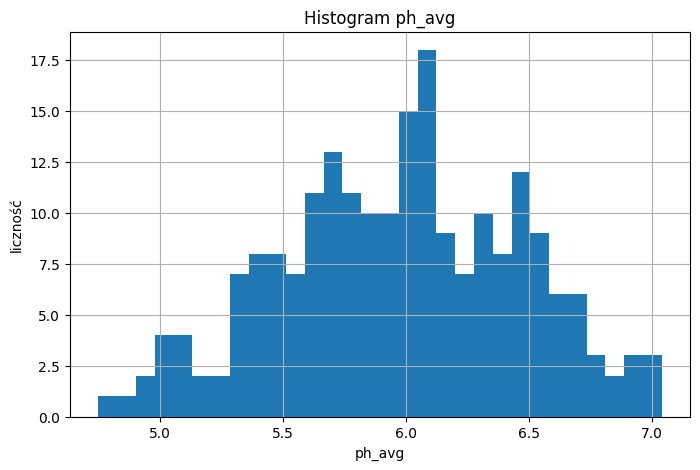

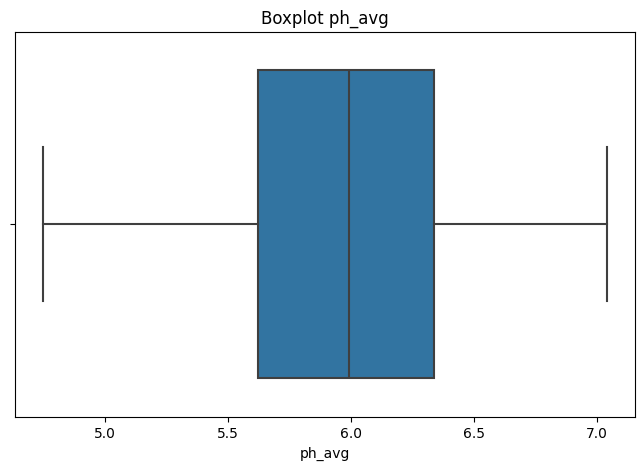

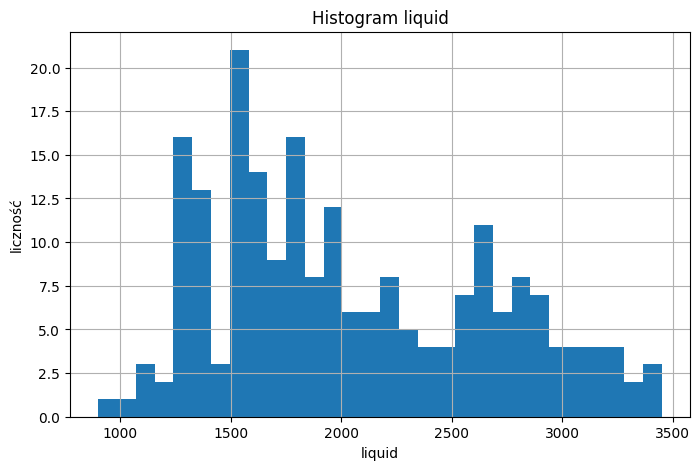

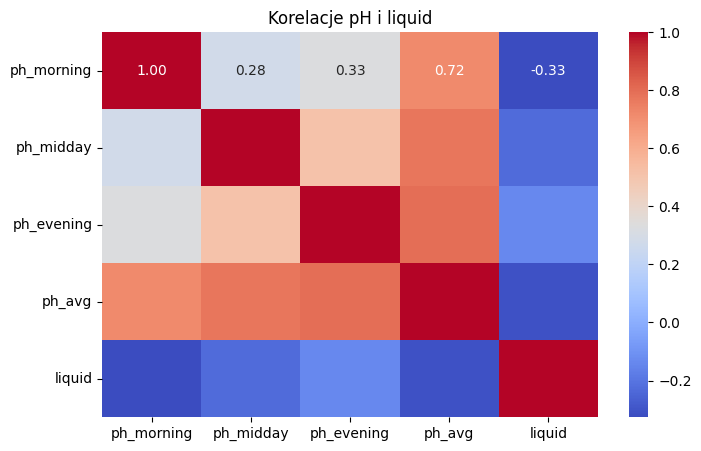

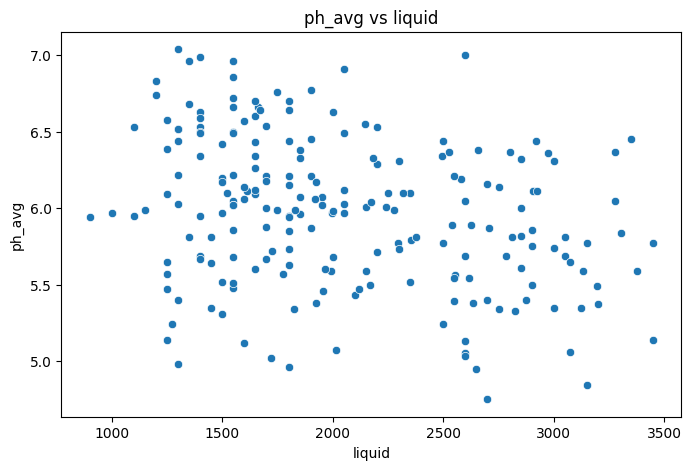

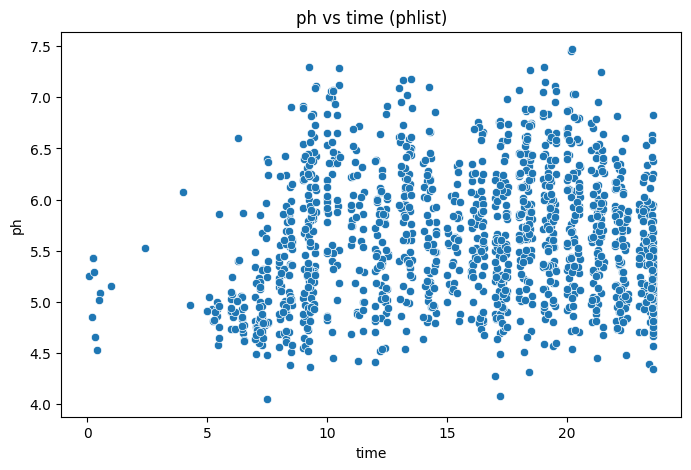

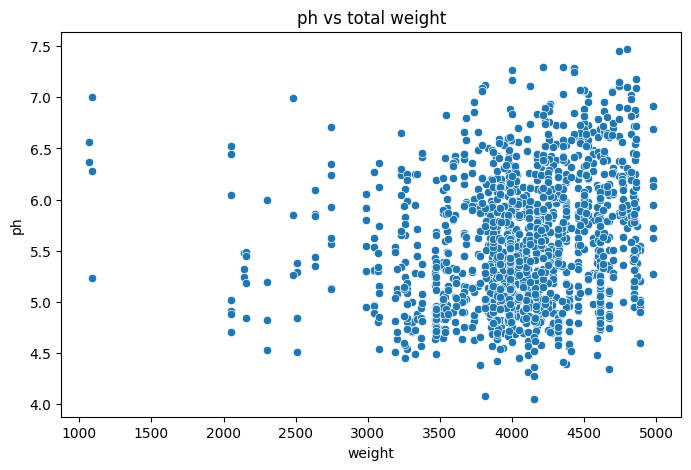

In [8]:
# 3. Etap: Analiza i wizualizacja
import matplotlib.pyplot as plt
import seaborn as sns

# Statystyki opisowe
print("Statystyki dzienne")
display(df_days.describe())

print("Statystyki phlist")
display(df_phlist.describe())

print("Statystyki prods")
display(df_prods.describe())

# Histogram pH_avg
if "ph_avg" in df_days.columns:
    plt.figure()
    df_days["ph_avg"].hist(bins=30)
    plt.title("Histogram ph_avg")
    plt.xlabel("ph_avg")
    plt.ylabel("liczność")
    plt.show()

# Boxplot ph_avg
if "ph_avg" in df_days.columns:
    plt.figure()
    sns.boxplot(x=df_days["ph_avg"])
    plt.title("Boxplot ph_avg")
    plt.show()

# Histogram płynów
if "liquid" in df_days.columns:
    plt.figure()
    df_days["liquid"].hist(bins=30)
    plt.title("Histogram liquid")
    plt.xlabel("liquid")
    plt.ylabel("liczność")
    plt.show()

# Korelacje wybranych kolumn
num_cols = [c for c in ["ph_morning", "ph_midday", "ph_evening", "ph_avg", "liquid"] if c in df_days.columns]
if len(num_cols) >= 2:
    corr = df_days[num_cols].corr(numeric_only=True)
    plt.figure()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Korelacje pH i liquid")
    plt.show()

# ph_avg vs liquid
if {"ph_avg", "liquid"}.issubset(df_days.columns):
    plt.figure()
    sns.scatterplot(data=df_days, x="liquid", y="ph_avg")
    plt.title("ph_avg vs liquid")
    plt.show()

# ph vs time
if {"ph", "time"}.issubset(df_phlist.columns):
    plt.figure()
    sns.scatterplot(data=df_phlist, x="time", y="ph")
    plt.title("ph vs time (phlist)")
    plt.show()

# ph vs weight (średnia w prods po dacie)
if {"date", "weight"}.issubset(df_prods.columns):
    daily_weight = df_prods.groupby("date")["weight"].sum().reset_index()
    merged = pd.merge(df_phlist, daily_weight, on="date", how="inner")
    plt.figure()
    sns.scatterplot(data=merged, x="weight", y="ph")
    plt.title("ph vs total weight")
    plt.show()


Accuracy: 0.868

Raport:
              precision    recall  f1-score   support

           0      0.894     0.955     0.923        44
           1      0.667     0.444     0.533         9

    accuracy                          0.868        53
   macro avg      0.780     0.699     0.728        53
weighted avg      0.855     0.868     0.857        53



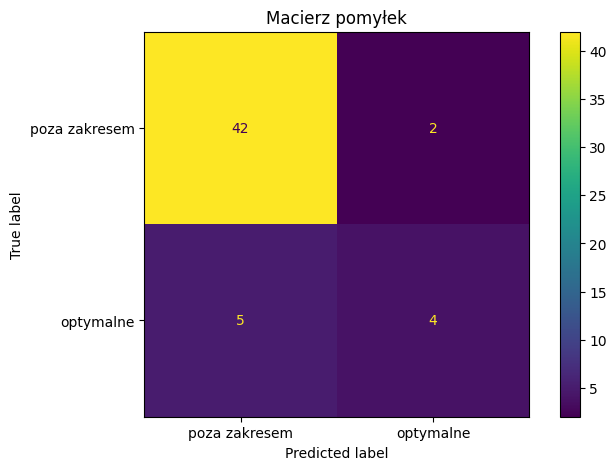

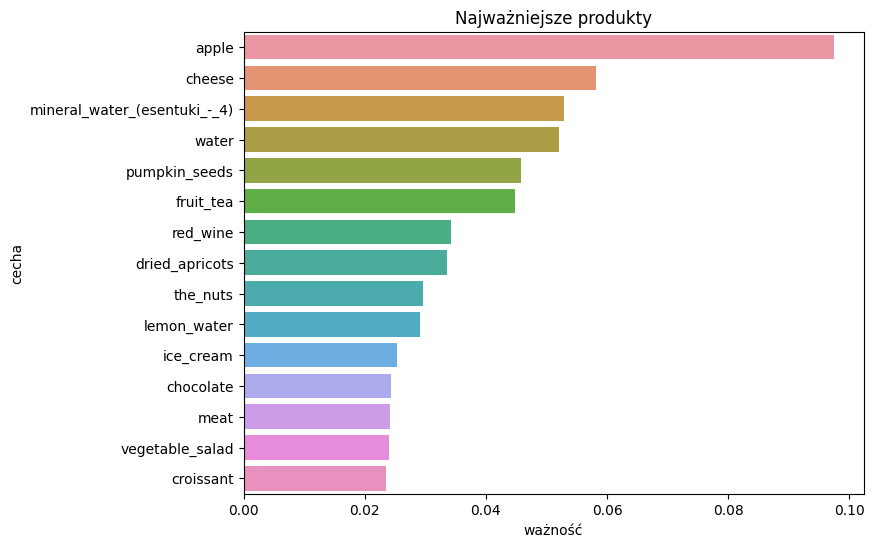

In [12]:
# Model: produkty vs pH
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

df = df_days.copy()
df["optimal_ph"] = ((df["ph_avg"] >= 6.4) & (df["ph_avg"] <= 6.8)).astype(int)

exclude = ["date", "ph_morning", "ph_midday", "ph_evening", "ph_avg", "optimal_ph", "liquid", "liquid_scaled"]
X = df.drop(columns=exclude, errors="ignore")
y = df["optimal_ph"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced",
    max_depth=8
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 3))
print("\nRaport:")
print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["poza zakresem", "optymalne"])
disp.plot(values_format="d")
plt.title("Macierz pomyłek")
plt.show()

# Ważność cech
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=importances.head(15), y=importances.head(15).index)
plt.title("Najważniejsze produkty")
plt.xlabel("ważność")
plt.ylabel("cecha")
plt.show()
